In [1]:
import numpy as np
from numba.typed import List as NumbaList
from BPmodule.BPGen import CreateData
from BPnumba.GeneticOperators import CreateHeuristicPob,InstancePob,MutateC2
from BPnumba.DFFA import createDFFA
from BPnumba.EDFFA import createEDFFA
import matplotlib.pyplot as plt

In [2]:
contenedor,data = CreateData(algorithm=1,problem=1)
datos = NumbaList(data[0])
n= len(datos)
n

15

In [3]:
pop= 50
initial = CreateHeuristicPob(pop,datos,True)
gamma= 1/n
maxItr=1000

In [4]:
initial[0]

[7, 3, 4, 11, 10, 15, 14, 5, 6, 1, 2, 9, 8, 13, 12]

In [5]:
Pob = InstancePob(NumbaList(initial),datos,contenedor)

c:\Users\nicoo\Anaconda3\lib\site-packages\numba\typed\typedlist.py:83: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'item' of function 'impl_append.<locals>.impl'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "..\..\Anaconda3\lib\site-packages\numba\typed\listobject.py", line 599:

    def impl(l, item):
    ^

  l.append(item)
c:\Users\nicoo\Anaconda3\lib\site-packages\numba\core\ir_utils.py:2139: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'item' of function '_append'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "..\..\Anaconda3\lib\site-packages\numba\typed\typedlist.py", line 82:
@nji

In [6]:
edffa = createEDFFA(mutType=2)

In [7]:
edffa.Train(maxItr,Pob,datos,contenedor)

<string>:3: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'fireflyPob' of function 'EDFFA.Train'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "BPnumba\EDFFA.py", line 52:

    def Train(self, Maxitr: int, fireflyPob: List[Ind], datos: List[List[int]], contenedor: List[int])->Ind:
    ^



In [8]:
edffa.BestInd.fi

1.0

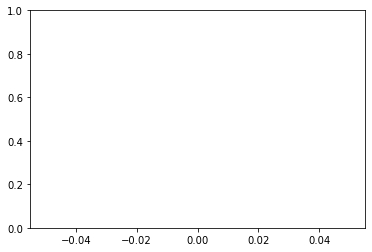

In [9]:
plt.figure()
plt.plot(edffa.bestfi,color='red')
plt.ylim(0,1)
plt.show()

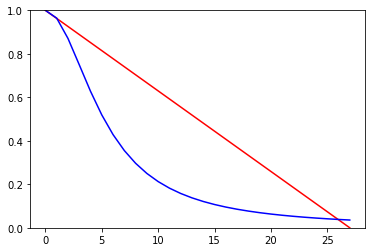

In [10]:
n=27
gamma = 1/n
plt.figure()
x=np.arange(n+1)
similarity = lambda x: 1-(x/n)
betta = lambda x :1/(1+gamma*((x)**2))
plt.plot(x,similarity(x),color='red')
plt.plot(x,betta(x),color='blue')
plt.ylim(0,1)
plt.show()